# Intel-Inspired Semiconductor Fab Analysis (MSE 507 Project)
**Author:** Jean Paul Collazo Arguedas  
**Course:** MSE 507 – Lean Manufacturing Systems  
**Date:** May 10, 2025

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset using raw string to handle backslashes correctly
df = pd.read_csv(r"C:\Users\colla\OneDrive\Desktop\Intel-Fab-Lean-Analysis\Intel_Fab_Dataset.csv")


In [6]:
summary = df.groupby("Fab_Step")[["Cycle_Time_Sec", "Queue_Time_Sec"]].mean()
summary.to_csv("summary_cycle_queue_by_step.csv")
summary


,Cycle_Time_Sec,Queue_Time_Sec
Fab_Step,,
CMP,1198.014289,597.426804
Deposition,1178.741569,604.453297
Doping,1187.505137,608.972363
Etching,1185.051445,608.509832
Inspection,1193.069122,595.413144
Packaging,1191.696934,603.841604
Photolithography,1202.181323,609.426573
Wafer_Start,1206.390995,601.743900


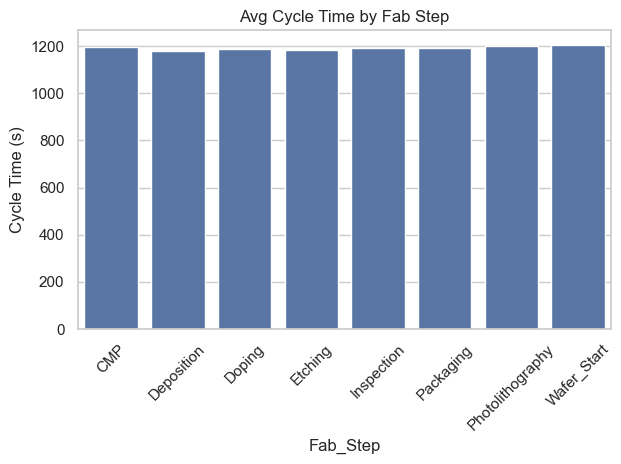

In [8]:
sns.set(style="whitegrid")
sns.barplot(x=summary.index, y=summary["Cycle_Time_Sec"])
plt.title("Avg Cycle Time by Fab Step")
plt.ylabel("Cycle Time (s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


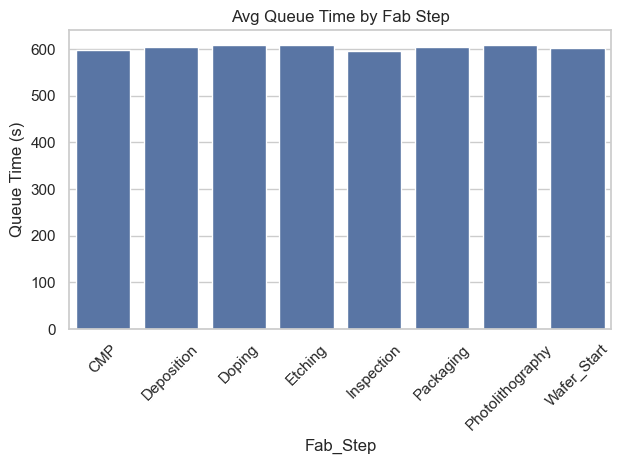

In [10]:
sns.barplot(x=summary.index, y=summary["Queue_Time_Sec"])
plt.title("Avg Queue Time by Fab Step")
plt.ylabel("Queue Time (s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


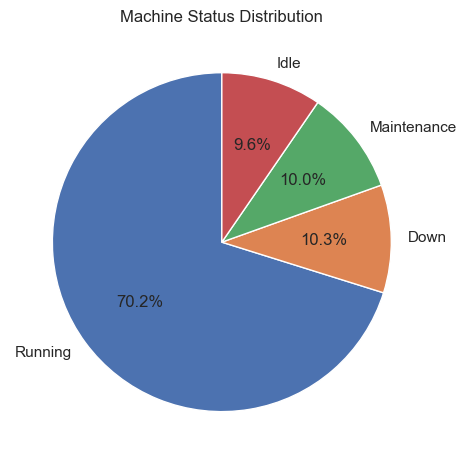

In [12]:
status_counts = df["Machine_Status"].value_counts()
status_counts.plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Machine Status Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


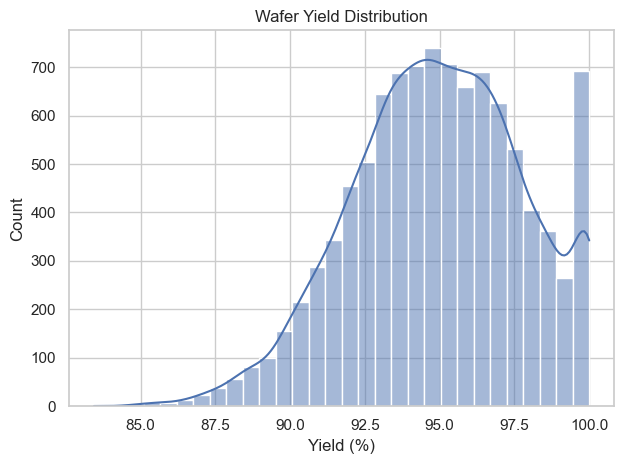

In [14]:
sns.histplot(df["Wafer_Yield_Percent"], bins=30, kde=True)
plt.title("Wafer Yield Distribution")
plt.xlabel("Yield (%)")
plt.tight_layout()
plt.show()


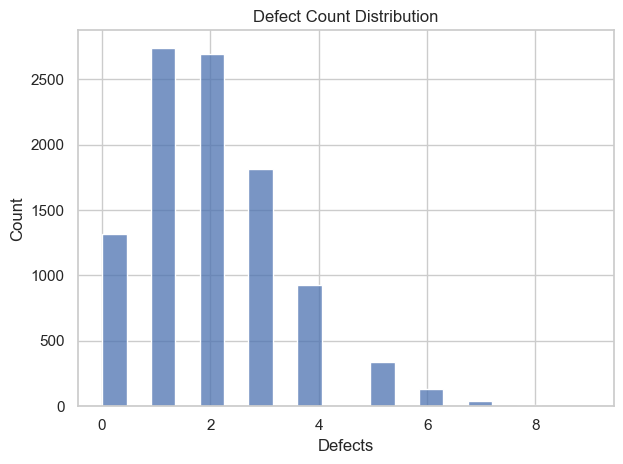

In [16]:
sns.histplot(df["Defect_Count"], bins=20)
plt.title("Defect Count Distribution")
plt.xlabel("Defects")
plt.tight_layout()
plt.show()


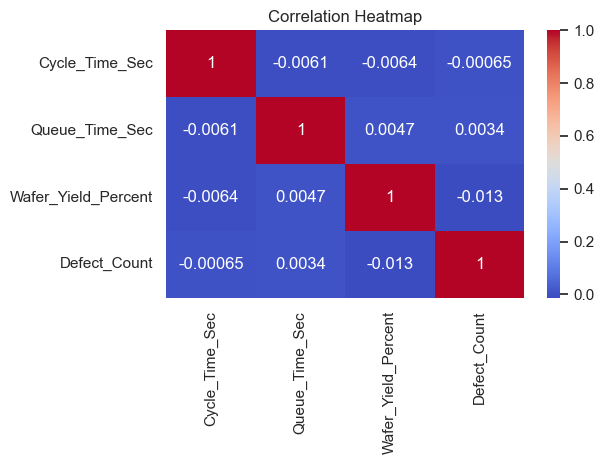

In [18]:
corr = df[["Cycle_Time_Sec", "Queue_Time_Sec", "Wafer_Yield_Percent", "Defect_Count"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


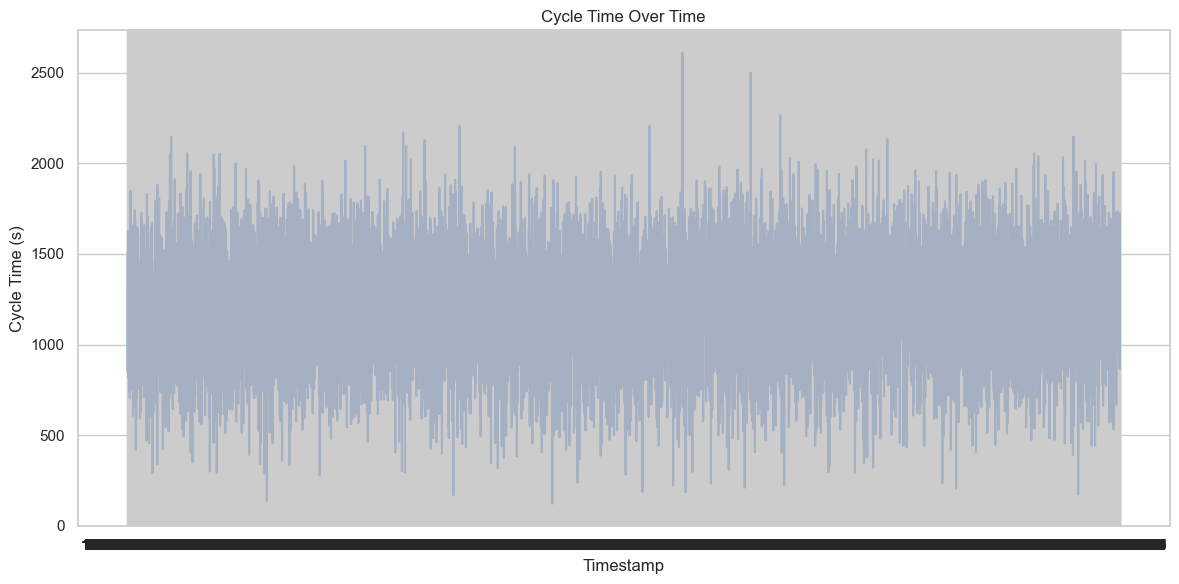

In [20]:
df_sorted = df.sort_values("Run_Timestamp")
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["Run_Timestamp"], df_sorted["Cycle_Time_Sec"], alpha=0.3)
plt.title("Cycle Time Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Cycle Time (s)")
plt.tight_layout()
plt.show()


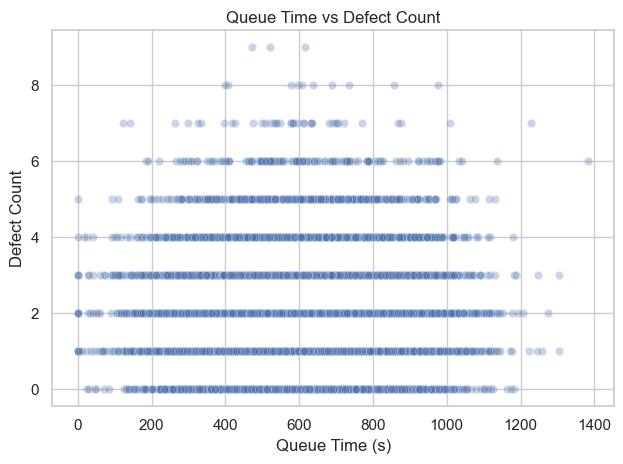

In [22]:
sns.scatterplot(data=df, x="Queue_Time_Sec", y="Defect_Count", alpha=0.3)
plt.title("Queue Time vs Defect Count")
plt.xlabel("Queue Time (s)")
plt.ylabel("Defect Count")
plt.tight_layout()
plt.show()
